# Emaar The Economic City's Financial Analysis

This notebook performs a comprehensive financial analysis of Emaar The Economic City Saudi company data, including growth analysis, profitability ratios, financial position metrics, and visualizations.

## Importing Libraries

In [1]:
# Import necessary libraries for data manipulation, analysis, and visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Loading and Exploration

In [2]:
# Load the Emaar raw data from the CSV file
emaar_ec_raw_data = pd.read_csv('emaar_ec_data.csv')

# Display the first few rows to understand the data structure
emaar_ec_raw_data.head()

,Year,Company_Name,Sector,Revenue_SAR,Net_Income_SAR,Operating_Income_SAR,Total_Assets_SAR,Total_Liabilities_SAR
0,2019,Emaar Economic City,Real Estate Development,946807,-533391,-337604,17333958,10231703
1,2020,Emaar Economic City,Real Estate Development,547287,-1248364,-1043639,16316662,10473389
2,2021,Emaar Economic City,Real Estate Development,372079,-836529,-690373,16376950,8600143
3,2022,Emaar Economic City,Real Estate Development,363267,-1157290,-794527,15190831,8536054
4,2023,Emaar Economic City,Real Estate Development,1031357,-253220,242738,15149663,8743415


In [3]:
# Get a summary of the dataset including data types and non-null counts
emaar_ec_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   6 non-null      int64 
 1   Company_Name           6 non-null      object
 2   Sector                 6 non-null      object
 3   Revenue_SAR            6 non-null      int64 
 4   Net_Income_SAR         6 non-null      int64 
 5   Operating_Income_SAR   6 non-null      int64 
 6   Total_Assets_SAR       6 non-null      int64 
 7   Total_Liabilities_SAR  6 non-null      int64 
dtypes: int64(6), object(2)
memory usage: 516.0+ bytes


## Data Preparation

Note: Gross Profit was excluded from the analysis due to the absence of a clearly disclosed cost of revenue structure in Emaar EC’s financial statements.

In [4]:
# Sort the data by year to ensure chronological order
emaar_ec_raw_data = emaar_ec_raw_data.sort_values(by='Year').reset_index(drop=True)

# Define the numeric columns that need to be converted
numeric_cols = ['Revenue_SAR', 'Net_Income_SAR','Operating_Income_SAR','Total_Assets_SAR', 'Total_Liabilities_SAR']

# Convert the specified columns to numeric type, coercing errors to NaN
emaar_ec_raw_data[numeric_cols] = emaar_ec_raw_data[numeric_cols].apply(pd.to_numeric, errors='coerce').astype(float)

# Display the prepared data
emaar_ec_raw_data

,Year,Company_Name,Sector,Revenue_SAR,Net_Income_SAR,Operating_Income_SAR,Total_Assets_SAR,Total_Liabilities_SAR
0,2019,Emaar Economic City,Real Estate Development,946807.0,-533391.0,-337604.0,17333958.0,10231703.0
1,2020,Emaar Economic City,Real Estate Development,547287.0,-1248364.0,-1043639.0,16316662.0,10473389.0
2,2021,Emaar Economic City,Real Estate Development,372079.0,-836529.0,-690373.0,16376950.0,8600143.0
3,2022,Emaar Economic City,Real Estate Development,363267.0,-1157290.0,-794527.0,15190831.0,8536054.0
4,2023,Emaar Economic City,Real Estate Development,1031357.0,-253220.0,242738.0,15149663.0,8743415.0
5,2024,Emaar Economic City,Real Estate Development,425970.0,-1134565.0,-477484.0,15090660.0,9823749.0


In [5]:
# Create a copy of the raw data for analysis to avoid modifying the original
emaar_ec_new_data = emaar_ec_raw_data.copy()

## Growth Analysis

In [6]:
# Calculate Year-over-Year Growth for Revenue
emaar_ec_new_data['Revenue_Growth_%'] = emaar_ec_new_data['Revenue_SAR'].pct_change() * 100

# Define a function to calculate Compound Annual Growth Rate (CAGR)
def calculate_cagr(start_value, end_value, periods):
    return ((end_value / start_value) ** (1 / periods) - 1) * 100

# Calculate and display the CAGR for Revenue
cagr_revenue = calculate_cagr(emaar_ec_new_data['Revenue_SAR'].iloc[0], emaar_ec_new_data['Revenue_SAR'].iloc[-1], len(emaar_ec_new_data)-1)
print(f"Revenue CAGR: {cagr_revenue:.2f}%")

Revenue CAGR: -14.76%


## Profitability Ratios

In [7]:
# Calculate Operating Margin as a percentage
emaar_ec_new_data['Operating_Margin_%'] = (emaar_ec_new_data['Operating_Income_SAR'] / emaar_ec_new_data['Revenue_SAR']) * 100

# Calculate Net Profit Margin as a percentage
emaar_ec_new_data['Net_Profit_Margin_%'] = (emaar_ec_new_data['Net_Income_SAR'] / emaar_ec_new_data['Revenue_SAR']) * 100

# Display the profitability ratios
print(emaar_ec_new_data[['Year', 'Operating_Margin_%', 'Net_Profit_Margin_%']])

   Year  Operating_Margin_%  Net_Profit_Margin_%
0  2019          -35.657109           -56.335769
1  2020         -190.693183          -228.100430
2  2021         -185.544736          -224.825642
3  2022         -218.717087          -318.578346
4  2023           23.535788           -24.552119
5  2024         -112.093340          -266.348569


## Financial Position

In [8]:
# Calculate Leverage Ratio: Liabilities to Assets as a percentage
emaar_ec_new_data['Liabilities_to_Assets_Ratio'] = (emaar_ec_new_data['Total_Liabilities_SAR'] / emaar_ec_new_data['Total_Assets_SAR']) * 100

# Calculate Asset Turnover Ratio
emaar_ec_new_data['Asset_Turnover_Ratio'] = emaar_ec_new_data['Revenue_SAR'] / emaar_ec_new_data['Total_Assets_SAR']

# Display the financial position ratios
print(emaar_ec_new_data[['Year', 'Liabilities_to_Assets_Ratio', 'Asset_Turnover_Ratio']])

   Year  Liabilities_to_Assets_Ratio  Asset_Turnover_Ratio
0  2019                    59.026929              0.054622
1  2020                    64.188306              0.033542
2  2021                    52.513704              0.022720
3  2022                    56.192146              0.023914
4  2023                    57.713594              0.068078
5  2024                    65.098206              0.028227


## Visualizations

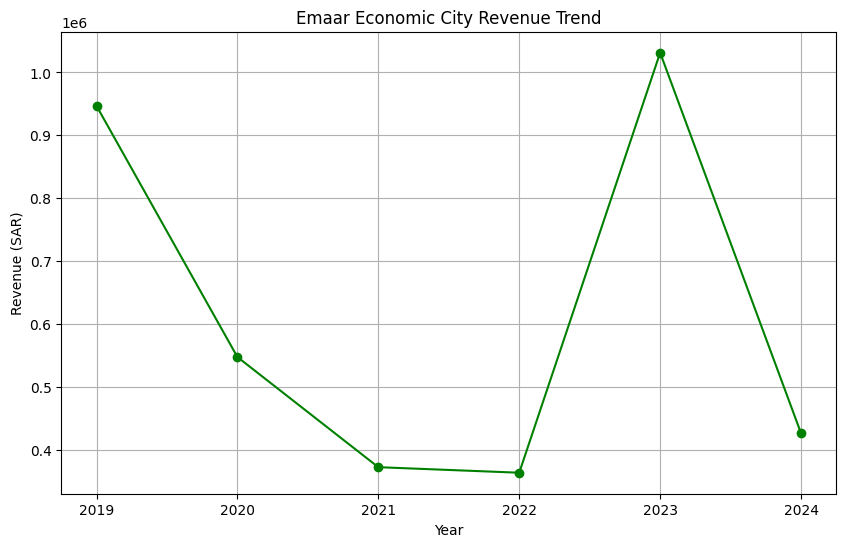

In [9]:
# Visualize Revenue Trend over Years
plt.figure(figsize=(10, 6))
plt.plot(emaar_ec_new_data["Year"], emaar_ec_new_data["Revenue_SAR"], marker='o', linestyle='-', color='green')
plt.title("Emaar Economic City Revenue Trend")
plt.xlabel("Year")
plt.ylabel("Revenue (SAR)")
plt.grid(True)
plt.show()

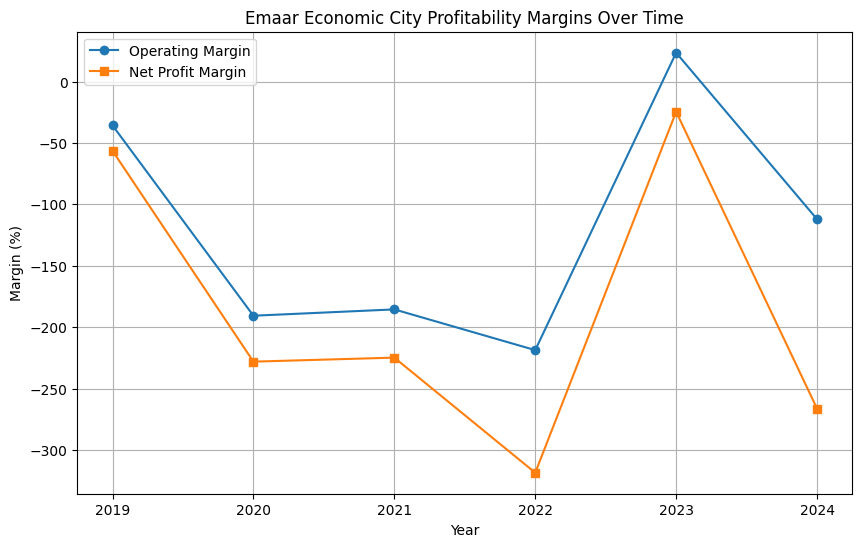

In [10]:
# Visualize Profitability Margins over Years
plt.figure(figsize=(10, 6))
plt.plot(emaar_ec_new_data["Year"], emaar_ec_new_data["Operating_Margin_%"], label="Operating Margin", marker='o')
plt.plot(emaar_ec_new_data["Year"], emaar_ec_new_data["Net_Profit_Margin_%"], label="Net Profit Margin", marker='s')
plt.legend()
plt.title("Emaar Economic City Profitability Margins Over Time")
plt.xlabel("Year")
plt.ylabel("Margin (%)")
plt.grid(True)
plt.show()

## Saving Analysis Results

In [11]:
# Save the analysis results to a CSV file
emaar_ec_new_data.to_csv('emaar_ec_analysis_results.csv', index=False)
print("Analysis results saved to 'emaar_ec_analysis_results.csv'")

Analysis results saved to 'emaar_ec_analysis_results.csv'


## Conclusion

This notebook has provided a comprehensive analysis of Emaar EC's financial data, including growth metrics, profitability ratios, financial position, and visualizations. The results have been saved for further use.